#  Chapter 6: Outlier Identification and Removal

---

##  What is an Outlier?

- An **outlier** is a data point that is significantly different from other observations in the dataset.
- Common causes of outliers:
  - Measurement or input error.
  - Data corruption.
  - True extreme (valid) observation.
- Outliers may represent rare events and may not always need to be removed.

---

##  Why Are Outliers Important?

- Outliers can distort statistical calculations and machine learning models.
- Removing or treating outliers can improve:
  - Model accuracy.
  - Generalization on new data.
- But careless removal can lead to loss of important data.

---

##  Methods for Outlier Detection and Removal

---

### 1️⃣ Standard Deviation Method

- Assumes data is approximately **Gaussian (normal)**.
- **Key thresholds**:
  - 68% of data within 1 standard deviation.
  - 95% within 2 standard deviations.
  - 99.7% within 3 standard deviations.
- Any value outside **3 standard deviations** is commonly flagged as an outlier.

---

### 2️⃣ Interquartile Range (IQR) Method

- Suitable for **non-normal data**.
- Steps:
  - **Q1** = 25th percentile
  - **Q3** = 75th percentile
  - **IQR** = Q3 - Q1
  - **Outlier bounds**:
    - Lower bound = Q1 - 1.5 × IQR
    - Upper bound = Q3 + 1.5 × IQR
- Values outside this range are considered outliers.

---

### 3️⃣ Automatic Outlier Detection (Model-Based)

- Uses machine learning models to detect outliers in high-dimensional data.
- Common algorithms:
  - `LocalOutlierFactor` (LOF)
  - `IsolationForest`
- Works by measuring how isolated or distant a sample is from its neighbors.
- Often used in real-world high-dimensional datasets.

---

##  Effect of Outlier Removal

- Can improve **model performance**, e.g., reduce error metrics like MAE.
- Helps in making the model less biased by rare events.
- Example: Removing outliers from training data improved MAE from 3.417 to 3.356.

---

##  Cautions and Best Practices

- Always **visualize** the data and outliers before removal.
- Domain knowledge is crucial — some outliers may be meaningful.
- Don’t remove outliers blindly, especially in small datasets.
- Consider multiple detection methods to cross-validate results.

---

##  Summary

- Outliers are unusual values that may skew model results.
- Three main methods to detect/remove:
  1. **Standard Deviation Method**
  2. **Interquartile Range (IQR) Method**
  3. **Automatic Model-Based Detection**
- Carefully evaluate before removing — balance between cleaning and losing information.

---



## Test Dataset


In [22]:
# generate gaussian data
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(10000) + 50
# summarize
print('mean=%.3f stdv=%.3f' % (mean(data), std(data)))


mean=50.049 stdv=4.994


##  Standard Deviation Method

# calculate summary statistics
data_mean, data_std = mean(data), std(data)
# define outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off


In [25]:
# identify outliers
outliers = [x for x in data if x < lower or x > upper]


In [26]:
# remove outliers
outliers_removed = [x for x in data if x > lower and x < upper]


In [27]:
# identify outliers with standard deviation
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(10000) + 50
# calculate summary statistics
data_mean, data_std = mean(data), std(data)
# define outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))


Identified outliers: 29
Non-outlier observations: 9971


## Interquartile Range Method


In [31]:
# identify outliers with interquartile range
from numpy.random import seed
from numpy.random import randn
from numpy import percentile

# seed the random number generator for reproducibility
seed(1)

# generate univariate observations (normal distributed data with mean=50, std=5)
data = 5 * randn(10000) + 50

# calculate interquartile range
q25, q75 = percentile(data, 25), percentile(data, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))

# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))


Percentiles: 25th=46.685, 75th=53.359, IQR=6.674
Identified outliers: 81
Non-outlier observations: 9919


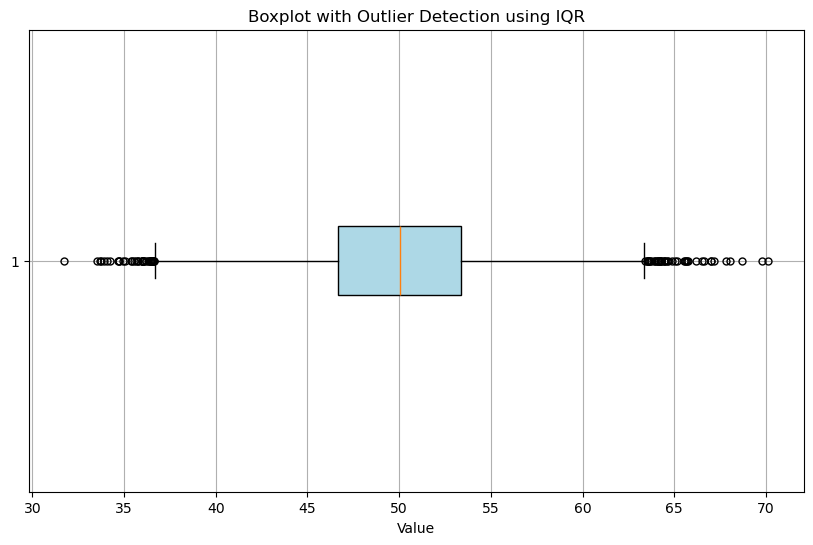

In [33]:
import matplotlib.pyplot as plt
from numpy.random import seed, randn
from numpy import percentile

# 1. Seed set, bulid random data
seed(1)
data = 5 * randn(10000) + 50  # mean=50, std=5

# 2. Calculate IQR
q25, q75 = percentile(data, 25), percentile(data, 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

# 3. Detect outliers
outliers = [x for x in data if x < lower or x > upper]
outliers_removed = [x for x in data if x >= lower and x <= upper]

# 4. Boxplot visualization
plt.figure(figsize=(10, 6))
plt.boxplot(data, vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightblue'),
            flierprops=dict(marker='o', color='red', markersize=5))

plt.title("Boxplot with Outlier Detection using IQR")
plt.xlabel("Value")
plt.grid(True)
plt.show()

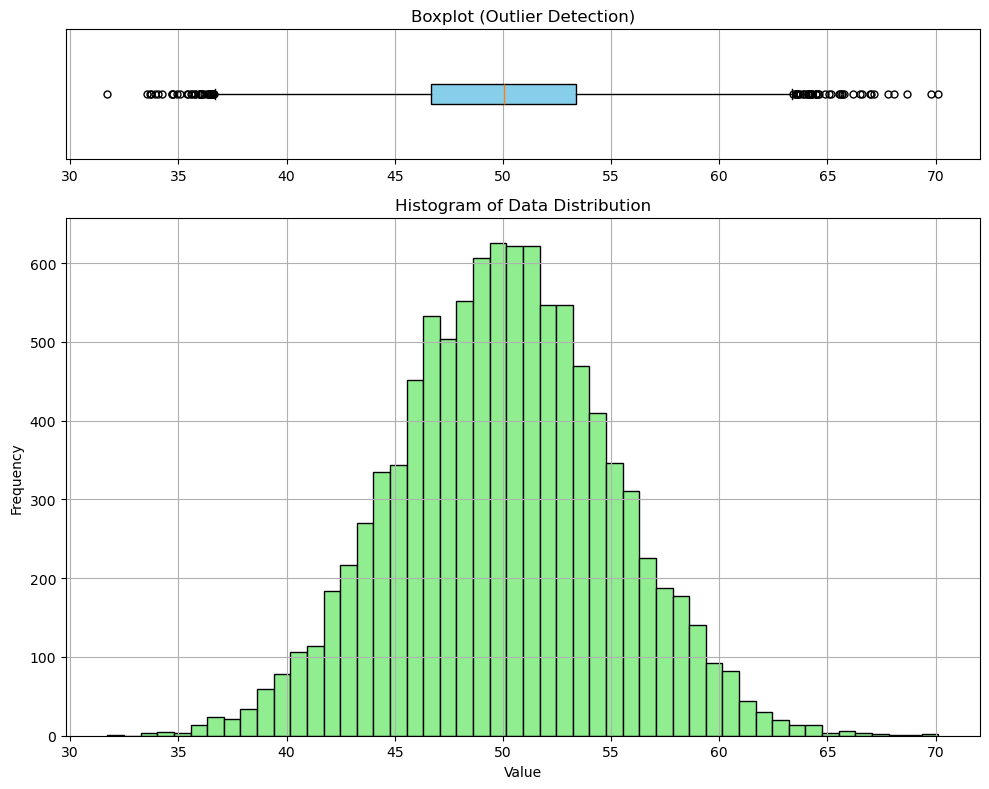

In [46]:
#  Histogram + Boxplot Combined Visualization

import matplotlib.pyplot as plt
from numpy.random import seed, randn
from numpy import percentile

# 1. Random data generate
seed(1)
data = 5 * randn(10000) + 50  # normal distributed data

# 2. Calculate IQR and Outliers
q25, q75 = percentile(data, 25), percentile(data, 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
outliers = [x for x in data if x < lower or x > upper]
outliers_removed = [x for x in data if x >= lower and x <= upper]

# 3. Create figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10, 8), gridspec_kw={'height_ratios': [1, 4]})

# 4. Boxplot (Top)
ax1.boxplot(data, vert=False, patch_artist=True,
            boxprops=dict(facecolor='skyblue'),
            flierprops=dict(marker='o', color='red', markersize=5))
ax1.set_title('Boxplot (Outlier Detection)')
ax1.set_yticks([])  # Hide y-axis ticks
ax1.grid(True)

# 5. Histogram (Bottom)
ax2.hist(data, bins=50, color='lightgreen', edgecolor='black')
ax2.set_title('Histogram of Data Distribution')
ax2.set_xlabel('Value')
ax2.set_ylabel('Frequency')
ax2.grid(True)

# 6. Show plot
plt.tight_layout()
plt.show()


## Automatic Outlier Detection


In [79]:
# Automatic outlier detection using Local Outlier Factor (handles NaN)
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.neighbors import LocalOutlierFactor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import numpy as np

# 1. Load dataset (header row present)
df = read_csv('HousingData.csv')
print("Shape of raw dataset:", df.shape)
print("Total NaNs:", df.isna().sum().sum())

# 2. Split into input/output arrays
X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values

# 3. Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=1)
print('Original training shape:', X_train.shape, y_train.shape)

# 4. ── Impute missing values (fit on TRAIN only ⇒ no data leakage)
imputer = SimpleImputer(strategy='median')
X_train_imp = imputer.fit_transform(X_train)
X_test_imp  = imputer.transform(X_test)       # use same fitted imputer

# 5. ── Detect outliers with LOF
lof  = LocalOutlierFactor()
yhat = lof.fit_predict(X_train_imp)

# 6. ── Remove outliers
mask = yhat != -1
X_train_clean, y_train_clean = X_train_imp[mask], y_train[mask]
print('Training shape after removing outliers:', X_train_clean.shape, y_train_clean.shape)

# 7. ── Train Linear Regression on cleaned, imputed data
model = LinearRegression()
model.fit(X_train_clean, y_train_clean)

# 8. ── Predict & evaluate on (imputed) test set
y_pred = model.predict(X_test_imp)
mae    = mean_absolute_error(y_test, y_pred)
print('MAE after removing outliers & imputing NaNs: %.3f' % mae)


Shape of raw dataset: (506, 14)
Total NaNs: 120
Original training shape: (339, 13) (339,)
Training shape after removing outliers: (307, 13) (307,)
MAE after removing outliers & imputing NaNs: 3.429


In [111]:
# Importing library 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import mean_absolute_error

df = pd.read_csv('HousingData.csv')

# Filling NA or missing values with the median
df = df.fillna(df.median())

# Splitting the dataset into input (X) and output (y)
# The last column (MEDV) is the target variable, others are inputs
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Printing the shape of the training dataset (number of rows and columns)
print('Training dataset shape:', X_train.shape, y_train.shape)

# Creating the LOF model for outlier detection
# Using default hyperparameters
lof = LocalOutlierFactor()

# Detecting outliers in the training dataset
# fit_predict returns 1 for normal data and -1 for outliers
yhat = lof.fit_predict(X_train)

# Filtering data that are not outliers (yhat != -1)
mask = yhat != -1
X_train = X_train[mask, :]
y_train = y_train[mask]

# Printing the shape of the updated training dataset after removing outliers
print('Training dataset shape after removing outliers:', X_train.shape, y_train.shape)

# Creating and fitting the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test data
y_pred = model.predict(X_test)

# Calculating Mean Absolute Error (MAE) to measure model performance
mae = mean_absolute_error(y_test, y_pred)
print('MAE: %.3f' % mae)

Training dataset shape: (339, 13) (339,)
Training dataset shape after removing outliers: (305, 13) (305,)
MAE: 3.655


In [115]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train_scaled)
yhat

array([ 1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
       -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1